In [2]:
import pandas as pd
import os
import pickle

In [ ]:
# paths
directory = '/home/jake/Documents/ML_BGP/results'
snapshot_dir = '/home/jake/Documents/ML_BGP'

In [ ]:
# initialize variables
prefix_dict = dict()

In [3]:
# constants
ACTION_IDX = 2
PREFIX_IDX = 5
TIME_IDX = 1
VPASN_IDX = 4
PATH_IDX = 6

In [4]:
class record:
    def __init__(self, init_state, time):
        self.last_state = init_state
        self.times = []
        self.timestamp = float(time)
        self.counter = 0
    def update(self, state, time):
        if state == 'W' and (self.last_state == 'B' or self.last_state == 'A'):
            self.last_state = 'W'
            self.times.append(float(time) - self.timestamp)
            self.timestamp = float(time)
            self.counter += 1
        elif state == 'A' and self.last_state == 'W':
            self.last_state = 'A'
            self.timestamp = float(time)

In [ ]:
# find a rib file (snapshot) to set up initial state for all prefixes
for filename in os.listdir(snapshot_dir):
    if 'rib' in filename:
        with open(filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                line = line.strip('\n').split('|')
                key = (line[PREFIX_IDX], line[VPASN_IDX])
                prefix_dict[key] = record(line[ACTION_IDX], line[TIME_IDX])
        break


In [ ]:
# scan through available updates and record all uptimes
update_dir_list = sorted(os.listdir(directory))
for filename in update_dir_list:
    if filename.endswith(".txt"):
        with open('./results/' + filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                line = line.strip('\n').split('|')
                key = (line[PREFIX_IDX], line[VPASN_IDX])
                if key not in prefix_dict and line[ACTION_IDX] == 'A':
                    prefix_dict[key] = record(line[ACTION_IDX], line[TIME_IDX])
                elif key in prefix_dict:
                    prefix_dict[key].update(line[ACTION_IDX], line[TIME_IDX])

In [ ]:
print(len(prefix_dict))

In [ ]:
print(prefix_dict[('1.0.0.0/24', 3130)])

In [ ]:
max_num = 0
for item in prefix_dict.items():
    if len(item[1].times) > max_num:
        max_num = len(item[1].times)
        item_max = item
print(item_max[0], max_num)

In [ ]:
print(prefix_dict[('91.203.234.0/24', '8492')].counter)

In [ ]:
with open('save.pickle', 'wb') as f:
    pickle.dump(prefix_dict ,f)

In [5]:
with open('save.pickle', 'rb') as f:
    test_dict = pickle.load(f)

In [6]:
print(len(test_dict))

29373890


In [5]:
data = sorted(test_dict.items(), key = lambda item: item[1].counter , reverse = True)

In [ ]:
del test_dict

In [22]:
print(len(data))

29373890


In [23]:
with open('save_sorted.pickle', 'wb') as f:
    pickle.dump(data[:90000:500] ,f)

In [ ]:
for i in range(len(data)):
    if data[i][1].counter < 400:
        print('the %dth data has sample size less than 50' % i)
        break

In [6]:
import matplotlib.pyplot as plt

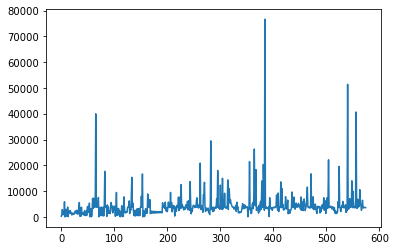

In [21]:
plt.plot(data[10000][1].times[:])

In [ ]:
print(item_max[1].times[-1])